In [1]:
import h5py
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

Using TensorFlow backend.


In [2]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn import metrics
from collections import OrderedDict
import dataexp as dtex # our code
import dataio as dtio # our code 
import preprocessing as pre # our code

from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# machine learning models/techniques third parties 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model as sklm

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    for i in range(0,y1.astype('int32').max()+1):
        plt.scatter(X_t[np.where(abs(y1) == i), 0], X_t[np.where(abs(y1) == i), 1], marker='o', color=plt.cm.nipy_spectral(i / 10.), linewidth='1', alpha=0.8, label='{}_label'.format(i))
        
    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();

In [4]:
x_train_o = pd.read_csv('financial_data.csv')
y_train_o = pd.read_csv('revealed_businesses.csv')

x_test_o = pd.read_csv("testing_data.csv")

x_train_o.replace('?', np.nan, inplace=True)
x_train_o = x_train_o.astype('float64')


x_test_o.replace('?', np.nan, inplace=True)
x_test_o = x_test_o.astype('float64')

data_all = x_train_o.merge(y_train_o, on='Var1', how = 'left')

,total_instances,total_instances_with_missing_values,total_instances_without_missing_values,data_loss
0,9003.0,4702.0,4301.0,0.5223


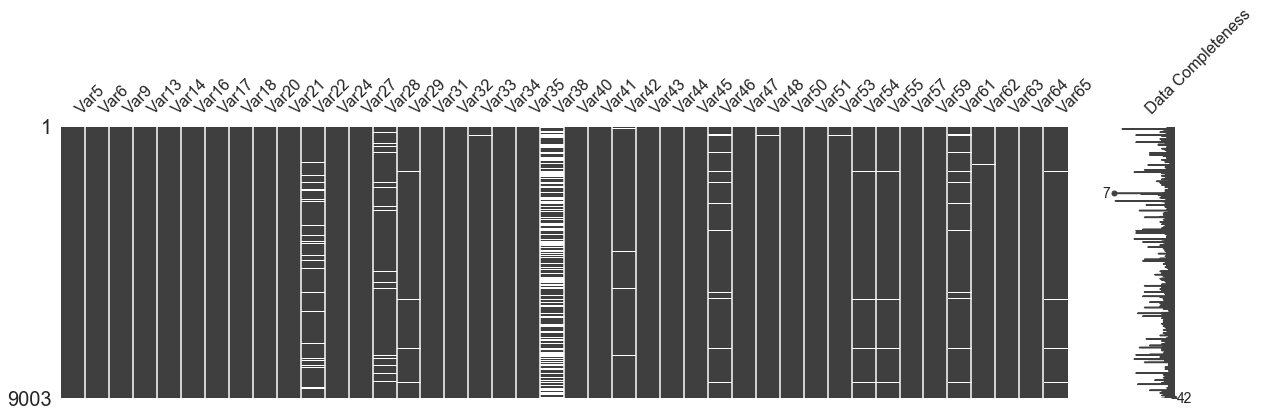

In [5]:
missing_stats_df = dtex.missing_stats(x_train_o)
display(missing_stats_df)
dtex.nullity_matrix([x_train_o], include_all = False)

In [6]:
data_nolabel = data_all[data_all.Var66.isnull()]
data_label = data_all[data_all.Var66.notnull()]

,total_instances,total_instances_with_missing_values,total_instances_without_missing_values,data_loss
0,4124.0,4124.0,0.0,1.0


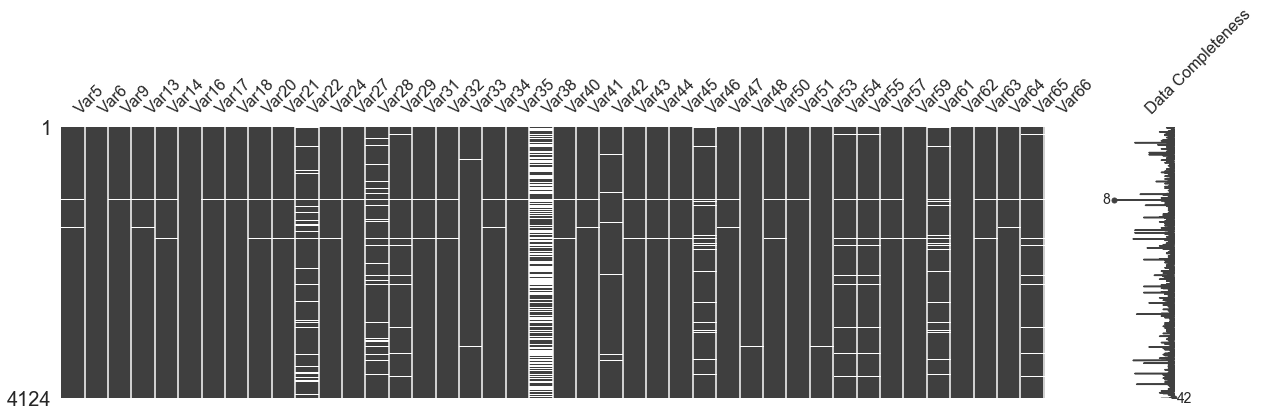

In [7]:
missing_stats_df_nolabel = dtex.missing_stats(data_nolabel)
display(missing_stats_df_nolabel)
dtex.nullity_matrix([data_nolabel], include_all = False)

,total_instances,total_instances_with_missing_values,total_instances_without_missing_values,data_loss
0,4879.0,2429.0,2450.0,0.4978


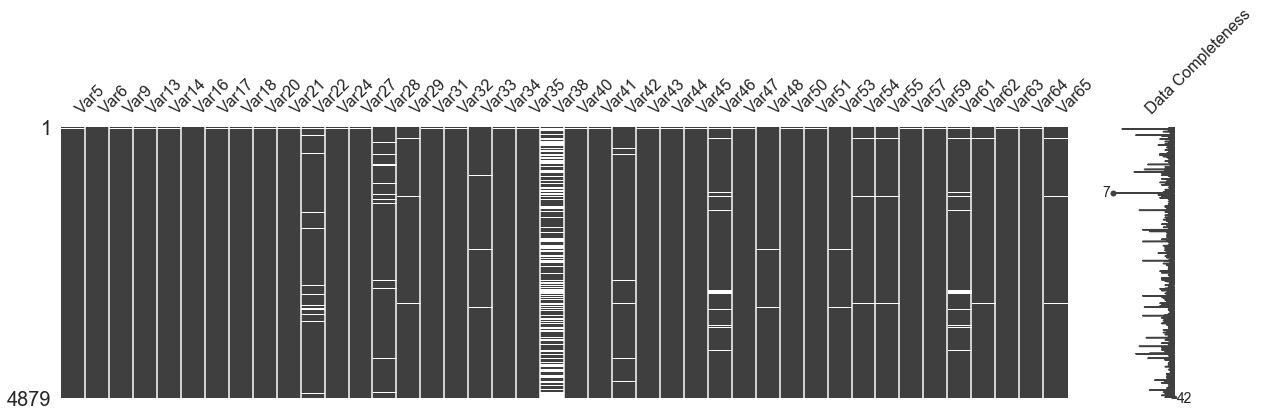

In [8]:
missing_stats_df_label = dtex.missing_stats(data_label)
display(missing_stats_df_label)
dtex.nullity_matrix([data_label], include_all = False)

In [9]:
data_nolabel_v = data_nolabel.drop(columns=['Var1', 'Var66'])
data_nolabel_id = data_nolabel['Var1']

data_label_v = data_label.drop(columns=['Var1', 'Var66'])
data_label_id = data_label['Var1']

data_nolabel_v_f = data_nolabel_v.fillna(data_nolabel_v.mean())
data_label_v_f = data_label_v.fillna(data_label_v.mean())

In [10]:
data_train_all_id = data_label['Var1']
data_train_all = data_label.drop(columns=['Var1'])

In [11]:
imp_mean_dfs = data_train_all.fillna(data_train_all.mean())
imp_mode_dfs = data_train_all.fillna(data_train_all.mode().iloc[0])

In [12]:
os_dfs_dict = OrderedDict()

os_dfs_dict['mean'] = pre.oversample_smote(imp_mean_dfs, columns = imp_mean_dfs.columns, verbose=True)

os_dfs_dict['mode'] = pre.oversample_smote(imp_mode_dfs, columns = imp_mode_dfs.columns, verbose=True)


original dataset (labels): {0.0: 4709, 1.0: 170}
total: 4879
resampled dataset (labels): {0.0: 4709, 1.0: 4709}
total: 9418

original dataset (labels): {0.0: 4709, 1.0: 170}
total: 4879
resampled dataset (labels): {0.0: 4709, 1.0: 4709}
total: 9418



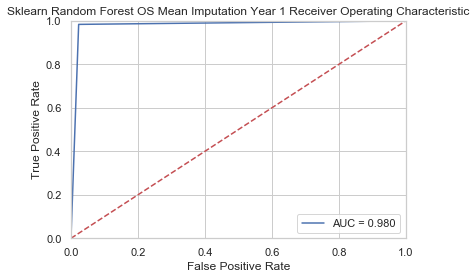

In [13]:
best_period = os_dfs_dict['mean'][0]

X = best_period.iloc[:,0:-1].values
X = preprocessing.MinMaxScaler().fit_transform(X)
y = best_period["Var66"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

random_forest_classifier_sklearn_roc = RandomForestClassifier(criterion="gini", 
                                                          n_estimators = 10,
                                                          max_features = "sqrt", 
                                                          random_state = 94)

random_forest_classifier_sklearn_roc.fit(X_train, y_train)
y_pred_dt = random_forest_classifier_sklearn_roc.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

plt.title('Sklearn Random Forest OS Mean Imputation Year 1 Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

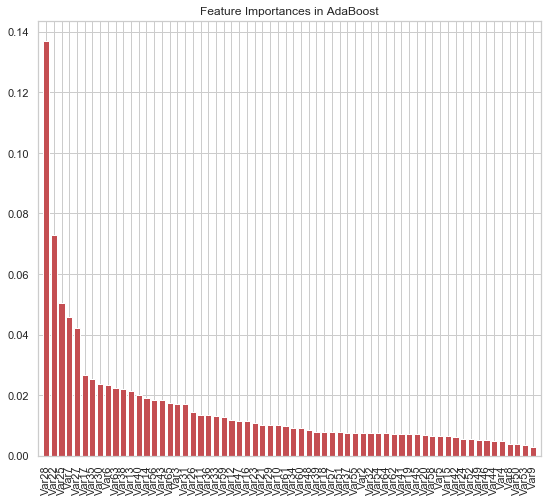

In [14]:
relevants = random_forest_classifier_sklearn_roc.feature_importances_
indices = np.argsort(relevants)[::-1]

# Plot feature importances
plt.figure(1, figsize=(9, 8))
plt.title('Feature Importances in AdaBoost')
plt.bar(range(X_train.shape[1]), relevants[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), data_label_v.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [15]:
data_label_v.columns[indices]

Index(['Var28', 'Var22', 'Var25', 'Var7', 'Var27', 'Var17', 'Var35', 'Var30',
       'Var6', 'Var63', 'Var38', 'Var13', 'Var40', 'Var14', 'Var56', 'Var43',
       'Var65', 'Var3', 'Var31', 'Var26', 'Var11', 'Var36', 'Var33', 'Var59',
       'Var12', 'Var47', 'Var16', 'Var23', 'Var21', 'Var29', 'Var10', 'Var61',
       'Var34', 'Var60', 'Var48', 'Var39', 'Var18', 'Var57', 'Var51', 'Var37',
       'Var55', 'Var2', 'Var32', 'Var54', 'Var64', 'Var62', 'Var41', 'Var19',
       'Var45', 'Var20', 'Var58', 'Var5', 'Var15', 'Var42', 'Var24', 'Var52',
       'Var49', 'Var46', 'Var44', 'Var4', 'Var8', 'Var50', 'Var53', 'Var9'],
      dtype='object')

In [28]:
important_features = ['Var28', 'Var22', 'Var25', 'Var7', 'Var27', 'Var17', 'Var35', 'Var30',
       'Var6', 'Var63', 'Var38', 'Var13', 'Var40', 'Var14', 'Var56', 'Var43',
       'Var65', 'Var3', 'Var31', 'Var26', 'Var11', 'Var36', 'Var33', 'Var59',
       'Var12', 'Var47', 'Var16', 'Var23', 'Var21', 'Var29', 'Var10', 'Var61',
       'Var34', 'Var60', 'Var48', 'Var39', 'Var18', 'Var57', 'Var51', 'Var37',
       'Var55', 'Var2', 'Var32', 'Var54', 'Var64', 'Var62', 'Var41', 'Var19', 'Var66']

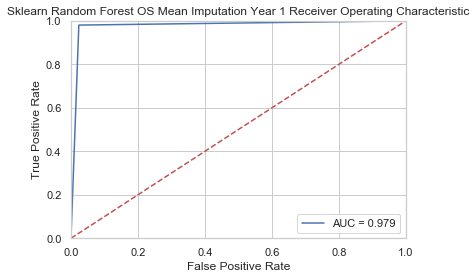

In [29]:
best_period = os_dfs_dict['mean'][0][important_features]

X = best_period.iloc[:,0:-1].values
X = preprocessing.MinMaxScaler().fit_transform(X)
y = best_period["Var66"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

random_forest_classifier_sklearn_roc = RandomForestClassifier(criterion="gini", 
                                                          n_estimators = 10,
                                                          max_features = "sqrt", 
                                                          random_state = 94)

random_forest_classifier_sklearn_roc.fit(X_train, y_train)
y_pred_dt = random_forest_classifier_sklearn_roc.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

plt.title('Sklearn Random Forest OS Mean Imputation Year 1 Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()